# Tuas 8 : Fuzzy c-means

code berikut bertujuan untuk menerapkan algoritme klasterisasi Fuzzy C-Means (FCM) pada data berbasis teks. Dimulai dengan memuat data dari sumber eksternal, notebook ini mengimpor pustaka penting seperti Pandas, NumPy, dan Scikit-learn. Data yang dimuat kemudian melalui tahap preprocessing, termasuk encoding data kategorik menggunakan LabelEncoder dan pembersihan teks seperti penghapusan stopword. Selanjutnya, teks diubah menjadi representasi numerik menggunakan TF-IDF untuk menghasilkan matriks fitur. Untuk menyederhanakan analisis, dilakukan reduksi dimensi menggunakan Truncated SVD.

Algoritme FCM diterapkan untuk mengelompokkan data ke dalam beberapa klaster, dengan jumlah klaster optimal ditentukan berdasarkan metrik evaluasi seperti silhouette score. Evaluasi klasterisasi dilakukan menggunakan metrik seperti Adjusted Rand Index (ARI), Silhouette Score, dan Normalized Mutual Information (NMI). Hasil klasterisasi divisualisasikan menggunakan Matplotlib dan Seaborn untuk memahami distribusi data dan kualitas klaster. Akhirnya, model FCM beserta hasil klasterisasi disimpan ke file untuk penggunaan di masa depan. Notebook ini menghasilkan model klasterisasi yang terlatih, visualisasi hasil, dan file berisi label klaster untuk setiap data.

In [61]:
from google.colab import drive
drive.mount('/content/drive')
# Import the pandas library and alias it as pd
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Ganti path dengan lokasi file di Google Drive Anda
file_path = '/content/drive/MyDrive/ppw/tugas/DataTugas2/Hasil_Prepros.csv'
data = pd.read_csv(file_path) # Now pd is defined and can be used

In [63]:
data

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,cleansing,case_folding,tokenize,stopword_removal
0,Pesan Anies ke Tom Lembong Tersangka Korupsi I...,Reporter\nNovali Panji Nugroho\nEditor\nEko Ar...,30-10-2024 05:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nEko Ar...,reporter\nnovali panji nugroho\neditor\neko ar...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor eko ari w...
1,"Tom Lembong Tersangka Korupsi Impor Gula, Nama...",Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,29-10-2024 23:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,reporter\nnovali panji nugroho\neditor\nahmad ...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor ahmad fai...
2,"Profil Tom Lembong, Eks Mendag dan Co-Captain ...",Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,29-10-2024 22:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,reporter\nnovali panji nugroho\neditor\nahmad ...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor ahmad fai...
3,Tom Lembong Sempat Unggah Hal Ini Sehari Sebel...,Reporter\nTempo.co\nEditor\nAndry Triyanto Tji...,30-10-2024 02:55,Nasional,Reporter\nTempoco\nEditor\nAndry Triyanto Tjit...,reporter\ntempoco\neditor\nandry triyanto tjit...,"['reporter', 'tempoco', 'editor', 'andry', 'tr...",reporter tempoco editor andry triyanto tjitra ...
4,"Prabowo Ingin Tingkatkan Pembangunan di Papua,...",Reporter\nVedro Imanuel G\nEditor\nAgung Seday...,29-10-2024 23:55,Bisnis,Reporter\nVedro Imanuel G\nEditor\nAgung Seday...,reporter\nvedro imanuel g\neditor\nagung seday...,"['reporter', 'vedro', 'imanuel', 'g', 'editor'...",reporter vedro imanuel g editor agung sedayu r...
...,...,...,...,...,...,...,...,...
95,Kementan Berencana Datangkan Sapi Hidup Ke Ind...,Reporter\nM. Raihan Muzzaki\nEditor\nAisha Sha...,30-10-2024 00:58,Bisnis,Reporter\nM Raihan Muzzaki\nEditor\nAisha Shai...,reporter\nm raihan muzzaki\neditor\naisha shai...,"['reporter', 'm', 'raihan', 'muzzaki', 'editor...",reporter m raihan muzzaki editor aisha shaidra...
96,"Profil Charles Sitorus, Tersangka dalam Kasus ...",Reporter\nAdil Al Hasan\nEditor\nRr. Ariyani Y...,30-10-2024 02:58,Bisnis,Reporter\nAdil Al Hasan\nEditor\nRr Ariyani Ya...,reporter\nadil al hasan\neditor\nrr ariyani ya...,"['reporter', 'adil', 'al', 'hasan', 'editor', ...",reporter adil al hasan editor rr ariyani yakti...
97,Bisik-bisik Prabowo kepada Fahri Hamzah Wakil ...,Reporter\nSukma Kanthi Nurani\nEditor\nS. Dian...,30-10-2024 03:58,Bisnis,Reporter\nSukma Kanthi Nurani\nEditor\nS Dian ...,reporter\nsukma kanthi nurani\neditor\ns dian ...,"['reporter', 'sukma', 'kanthi', 'nurani', 'edi...",reporter sukma kanthi nurani editor s dian and...
98,"Tom Lembong Jadi Tersangka, Ini Kata Anies, Mu...","Reporter\nAntara\nEditor\nYudono Yanuar\nRabu,...",30-10-2024 10:58,Bisnis,Reporter\nAntara\nEditor\nYudono Yanuar\nRabu ...,reporter\nantara\neditor\nyudono yanuar\nrabu ...,"['reporter', 'antara', 'editor', 'yudono', 'ya...",reporter editor yudono yanuar rabu oktober wib...


In [64]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
data.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(data['Kategori Berita'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
data


Nilai sebelum dan sesudah konversi:
{'Bisnis': 0, 'Nasional': 1}

DataFrame setelah Label Encoding:


,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,cleansing,case_folding,tokenize,stopword_removal,kategori_encoded
0,Pesan Anies ke Tom Lembong Tersangka Korupsi I...,Reporter\nNovali Panji Nugroho\nEditor\nEko Ar...,30-10-2024 05:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nEko Ar...,reporter\nnovali panji nugroho\neditor\neko ar...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor eko ari w...,1
1,"Tom Lembong Tersangka Korupsi Impor Gula, Nama...",Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,29-10-2024 23:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,reporter\nnovali panji nugroho\neditor\nahmad ...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor ahmad fai...,1
2,"Profil Tom Lembong, Eks Mendag dan Co-Captain ...",Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,29-10-2024 22:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,reporter\nnovali panji nugroho\neditor\nahmad ...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor ahmad fai...,1
3,Tom Lembong Sempat Unggah Hal Ini Sehari Sebel...,Reporter\nTempo.co\nEditor\nAndry Triyanto Tji...,30-10-2024 02:55,Nasional,Reporter\nTempoco\nEditor\nAndry Triyanto Tjit...,reporter\ntempoco\neditor\nandry triyanto tjit...,"['reporter', 'tempoco', 'editor', 'andry', 'tr...",reporter tempoco editor andry triyanto tjitra ...,1
4,"Prabowo Ingin Tingkatkan Pembangunan di Papua,...",Reporter\nVedro Imanuel G\nEditor\nAgung Seday...,29-10-2024 23:55,Bisnis,Reporter\nVedro Imanuel G\nEditor\nAgung Seday...,reporter\nvedro imanuel g\neditor\nagung seday...,"['reporter', 'vedro', 'imanuel', 'g', 'editor'...",reporter vedro imanuel g editor agung sedayu r...,0
...,...,...,...,...,...,...,...,...,...
95,Kementan Berencana Datangkan Sapi Hidup Ke Ind...,Reporter\nM. Raihan Muzzaki\nEditor\nAisha Sha...,30-10-2024 00:58,Bisnis,Reporter\nM Raihan Muzzaki\nEditor\nAisha Shai...,reporter\nm raihan muzzaki\neditor\naisha shai...,"['reporter', 'm', 'raihan', 'muzzaki', 'editor...",reporter m raihan muzzaki editor aisha shaidra...,0
96,"Profil Charles Sitorus, Tersangka dalam Kasus ...",Reporter\nAdil Al Hasan\nEditor\nRr. Ariyani Y...,30-10-2024 02:58,Bisnis,Reporter\nAdil Al Hasan\nEditor\nRr Ariyani Ya...,reporter\nadil al hasan\neditor\nrr ariyani ya...,"['reporter', 'adil', 'al', 'hasan', 'editor', ...",reporter adil al hasan editor rr ariyani yakti...,0
97,Bisik-bisik Prabowo kepada Fahri Hamzah Wakil ...,Reporter\nSukma Kanthi Nurani\nEditor\nS. Dian...,30-10-2024 03:58,Bisnis,Reporter\nSukma Kanthi Nurani\nEditor\nS Dian ...,reporter\nsukma kanthi nurani\neditor\ns dian ...,"['reporter', 'sukma', 'kanthi', 'nurani', 'edi...",reporter sukma kanthi nurani editor s dian and...,0
98,"Tom Lembong Jadi Tersangka, Ini Kata Anies, Mu...","Reporter\nAntara\nEditor\nYudono Yanuar\nRabu,...",30-10-2024 10:58,Bisnis,Reporter\nAntara\nEditor\nYudono Yanuar\nRabu ...,reporter\nantara\neditor\nyudono yanuar\nrabu ...,"['reporter', 'antara', 'editor', 'yudono', 'ya...",reporter editor yudono yanuar rabu oktober wib...,0


di atas adalah proses encode dari nilai kategori berita
sebelum dan sesudah konversi:

{'Bisnis': 0, 'Nasional': 1}


In [67]:
category_mapping = {
    'Bisnis': 0,
    'Nasional': 1
}

data['kategori_encoded'] = data['Kategori Berita'].map(category_mapping)

# Save  dataset
output_file_path = 'kategori_encoded_data.csv'
data.to_csv(output_file_path, index=False)

print(f"File berhasil simpan")
output_file_path

File berhasil simpan


'kategori_encoded_data.csv'

## Menerapkan Vektorisasi TF-IDF :

Kode berikut mengambil teks dari kolom `stopword_removal` pada dataset, menghapus nilai kosong, dan melakukan vektorisasi menggunakan metode TF-IDF untuk menghasilkan bobot kata berdasarkan frekuensi relatif dan *inverse document frequency*. Matriks hasil TF-IDF kemudian dinormalisasi menggunakan *StandardScaler* untuk menstandarkan data dengan rata-rata 0 dan standar deviasi 1. Nama fitur (kata unik) yang dihasilkan diekstraksi, dan matriks TF-IDF dikonversi menjadi DataFrame untuk mempermudah analisis. Hasil akhir disimpan dalam file CSV bernama `tf-idf.csv`, dan dimensi matriks TF-IDF diperiksa untuk mengetahui jumlah dokumen dan kata unik.

In [68]:
texts = data['stopword_removal']

In [69]:
# Vektorisasi TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


# Assuming 'texts' is your pandas Series containing text data
# Drop rows with missing values in 'texts' column
texts = texts.dropna()

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
X_tfidf = tfidf_matrix.toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tfidf)

In [70]:
# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df_train_tfidf
df_train_tfidf.to_csv("tf-idf.csv", index=False)
X_tfidf.shape

(99, 1744)

## mencari jumlah komponen terbaik (n_components)

kode berikut untuk mencari jumlah komponen terbaik (n_components) dalam reduksi dimensi menggunakan TruncatedSVD dan mengevaluasi hasil clustering menggunakan Fuzzy C-Means (FCM) dengan mengukur kualitas clustering berdasarkan tiga metrik utama: Silhouette Score, Adjusted Rand Index (ARI), dan Normalized Mutual Information (NMI). yang ber tujuan untuk mencari kombinasi yang optimal antara jumlah komponen dalam reduksi dimensi dan kualitas hasil clustering yang sesuai dengan label asli data.

## Fuzzy C-Means Clustering

In [ ]:
!pip install fuzzy-c-means

In [71]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score  # Impor silhouette_score
from fcmeans import FCM
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import numpy as np

# Pastikan X_scaled sudah terdefinisi sebelumnya

# Inisialisasi variabel untuk menyimpan hasil
best_silhouette = -1
best_ari = -1
best_nmi = -1
best_n_components = 0
results = {}

# Asumsikan y_true adalah label asli dari dataset Anda
y_true = data['kategori_encoded']  # Ganti 'kategori' dengan nama kolom label asli

# Mendapatkan indeks baris yang digunakan dalam X_scaled
# Asumsi: Anda sudah menghapus baris dengan nilai kosong di 'texts' sebelum membuat X_scaled
valid_indices = texts.index

# Filter y_true agar ukurannya sesuai dengan X_scaled
y_true_filtered = y_true.loc[valid_indices]

for n in range(2, 100):  # Rentang nilai n_components
    # Reduksi dimensi menggunakan TruncatedSVD
    svd = TruncatedSVD(n_components=n, random_state=42)
    data_reduced = svd.fit_transform(X_scaled)

    # Fuzzy C-Means Clustering
    fcm = FCM(n_clusters=2, m=2.0, max_iter=1000, epsilon=0.001, random_state=42)
    # m= jarak kedekatan antara cluster
    fcm.fit(data_reduced)
    cluster_labels = fcm.predict(data_reduced)

    # Evaluasi dengan Silhouette Score, ARI, dan NMI
    silhouette = silhouette_score(data_reduced, cluster_labels)

    # Gunakan y_true yang sudah difilter untuk menghitung adjusted_rand_score
    ari = adjusted_rand_score(y_true_filtered, cluster_labels)

    nmi = normalized_mutual_info_score(y_true_filtered, cluster_labels)

    # Simpan hasil evaluasi dalam dictionary results
    results[n] = {
        'silhouette': silhouette,
        'ari': ari,
        'nmi': nmi
    }

    # Log hasil setiap iterasi
    print(f"Iterasi dengan n_components={n}: Silhouette={silhouette}, ARI={ari}, NMI={nmi}")

    # Perbarui nilai terbaik
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_n_components = n
    if ari > best_ari:
        best_ari = ari
    if nmi > best_nmi:
        best_nmi = nmi


Iterasi dengan n_components=2: Silhouette=0.49418730089228674, ARI=-0.007553863963821406, NMI=0.001985708267967615
Iterasi dengan n_components=3: Silhouette=0.44759627539838964, ARI=-0.007553863963821406, NMI=0.001985708267967615
Iterasi dengan n_components=4: Silhouette=0.3276829496290099, ARI=-0.007721718269735362, NMI=0.0018210073067904207
Iterasi dengan n_components=5: Silhouette=0.2683529622488039, ARI=-0.007679749450256547, NMI=0.0018014755451583296
Iterasi dengan n_components=6: Silhouette=0.2372758834309032, ARI=-0.007679749450256547, NMI=0.0018014755451583296
Iterasi dengan n_components=7: Silhouette=0.2152002715139566, ARI=-0.007679749450256547, NMI=0.0018014755451583296
Iterasi dengan n_components=8: Silhouette=0.20120253368123725, ARI=-0.007679749450256547, NMI=0.0018014755451583296
Iterasi dengan n_components=9: Silhouette=0.18452956910998636, ARI=-0.007679749450256547, NMI=0.0018014755451583296
Iterasi dengan n_components=10: Silhouette=0.15995544981844922, ARI=-0.0076797

In [73]:
# Menyimpan hasil terbaik untuk setiap metrik
best_silhouette_n_components = max(results, key=lambda x: results[x]['silhouette'])
best_ari_n_components = max(results, key=lambda x: results[x]['ari'])
best_nmi_n_components = max(results, key=lambda x: results[x]['nmi'])

# Menampilkan hasil terbaik
print(f"\nNilai Silhouette terbaik dicapai oleh n_components={best_silhouette_n_components} dengan skor: {results[best_silhouette_n_components]['silhouette']}")
print(f"Nilai ARI terbaik dicapai oleh n_components={best_ari_n_components} dengan skor: {results[best_ari_n_components]['ari']}")
print(f"Nilai NMI terbaik dicapai oleh n_components={best_nmi_n_components} dengan skor: {results[best_nmi_n_components]['nmi']}")


Nilai Silhouette terbaik dicapai oleh n_components=2 dengan skor: 0.49418730089228674
Nilai ARI terbaik dicapai oleh n_components=19 dengan skor: 0.03638012362420239
Nilai NMI terbaik dicapai oleh n_components=19 dengan skor: 0.03805533927506222


In [75]:
# Mengurutkan hasil berdasarkan silhouette score (dari tertinggi ke terendah)
sorted_results = sorted(results.items(), key=lambda x: x[1]['silhouette'], reverse=True)

# Menampilkan hasil akhir
print(f"\nn_components Terbaik: {best_n_components} dengan silhouette score: {best_silhouette}")
print("\nSemua hasil (diurutkan berdasarkan silhouette score):")
for n, score in sorted_results:
    print(f"n_components={n}: Silhouette Score={score}")


n_components Terbaik: 2 dengan silhouette score: 0.49418730089228674

Semua hasil (diurutkan berdasarkan silhouette score):
n_components=2: Silhouette Score={'silhouette': 0.49418730089228674, 'ari': -0.007553863963821406, 'nmi': 0.001985708267967615}
n_components=3: Silhouette Score={'silhouette': 0.44759627539838964, 'ari': -0.007553863963821406, 'nmi': 0.001985708267967615}
n_components=4: Silhouette Score={'silhouette': 0.3276829496290099, 'ari': -0.007721718269735362, 'nmi': 0.0018210073067904207}
n_components=5: Silhouette Score={'silhouette': 0.2683529622488039, 'ari': -0.007679749450256547, 'nmi': 0.0018014755451583296}
n_components=6: Silhouette Score={'silhouette': 0.2372758834309032, 'ari': -0.007679749450256547, 'nmi': 0.0018014755451583296}
n_components=7: Silhouette Score={'silhouette': 0.2152002715139566, 'ari': -0.007679749450256547, 'nmi': 0.0018014755451583296}
n_components=8: Silhouette Score={'silhouette': 0.20120253368123725, 'ari': -0.007679749450256547, 'nmi': 0

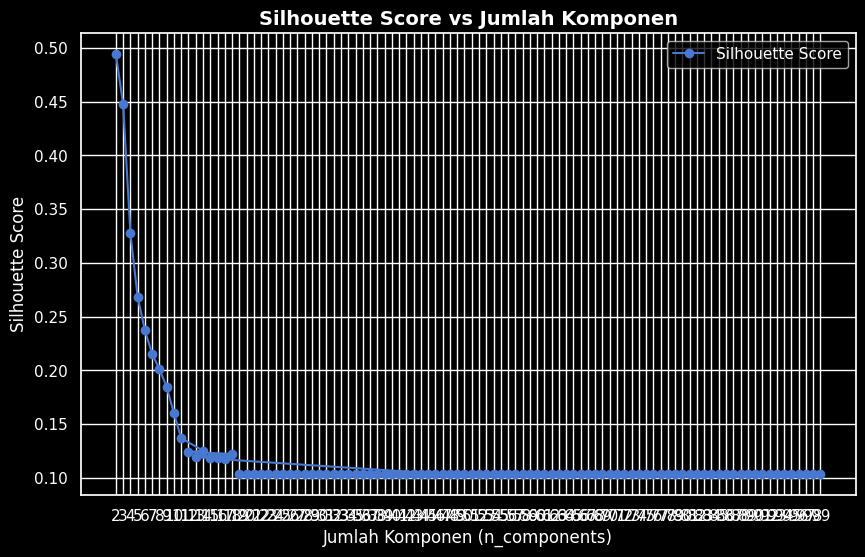

In [94]:
import matplotlib.pyplot as plt

# Ambil data untuk plotting
n_components_list = [n for n, _ in sorted_results]
silhouette_scores = [score['silhouette'] for _, score in sorted_results]

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Jumlah Komponen (n_components)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Jumlah Komponen', fontsize=14, fontweight='bold')
plt.grid(True)
plt.xticks(n_components_list)  # Tampilkan setiap nilai n_components pada sumbu x
plt.legend(loc='best')
plt.show()


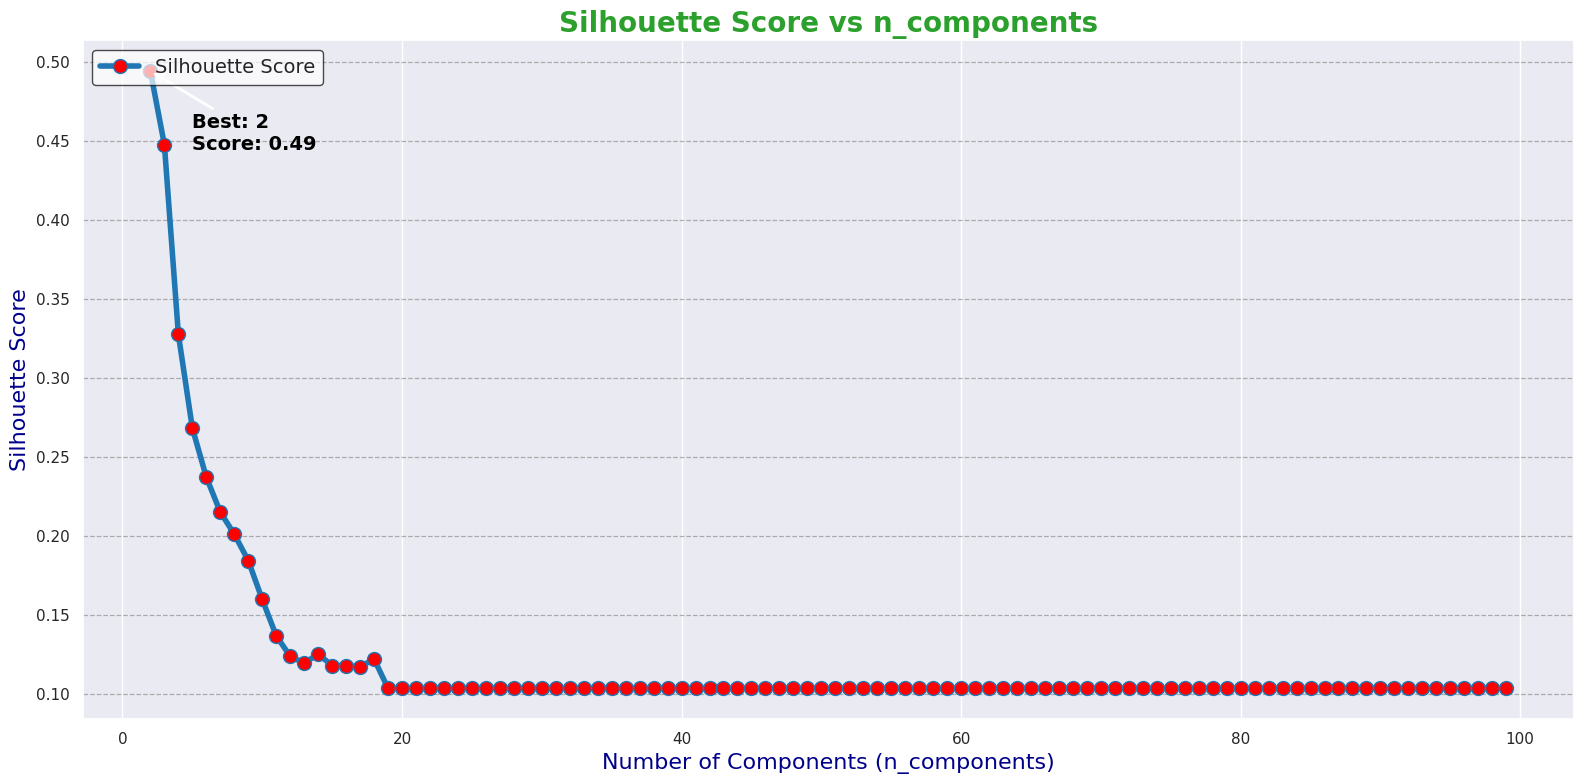

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data untuk plotting
n_components = list(results.keys())
silhouette_scores = [metrics['silhouette'] for metrics in results.values()]

# Mengubah gaya plot dengan tema Seaborn
sns.set_theme(style="darkgrid", palette="muted")  # Gunakan palet warna yang lebih jelas

# Membuat figure dengan ukuran lebih besar
plt.figure(figsize=(16, 8))

# Plot garis dengan gaya dan marker berbeda
plt.plot(n_components, silhouette_scores, label="Silhouette Score", color="#1f77b4", linewidth=4, marker="o", markersize=10, markerfacecolor="red")

# Menambahkan grid horizontal dengan penyesuaian
plt.grid(axis="y", color="gray", linestyle="--", linewidth=0.9, alpha=0.6)

# Menambahkan judul dan label dengan font yang lebih besar dan kontras
plt.title("Silhouette Score vs n_components", fontsize=20, fontweight="bold", color="#2ca02c")
plt.xlabel("Number of Components (n_components)", fontsize=16, color="darkblue")
plt.ylabel("Silhouette Score", fontsize=16, color="darkblue")

# Menambahkan anotasi untuk nilai maksimum dengan penyesuaian warna dan posisi
max_score = max(silhouette_scores)
best_n = n_components[silhouette_scores.index(max_score)]
plt.annotate(f"Best: {best_n}\nScore: {max_score:.2f}",
             xy=(best_n, max_score), xytext=(best_n + 3, max_score - 0.05),
             arrowprops=dict(facecolor='orange', arrowstyle="->", lw=2),
             fontsize=14, color="black", weight="bold")

# Menambahkan legenda dengan gaya yang lebih modern
plt.legend(fontsize=14, loc="upper left", facecolor="white", edgecolor="black", framealpha=0.7)

# Menampilkan grafik dengan layout yang lebih rapih
plt.tight_layout()

# Menampilkan grafik
plt.show()


## Visualisasi

Silhouette Score: 0.1035
Jumlah data pada setiap cluster:
Cluster
0    61
1    39
Name: count, dtype: int64


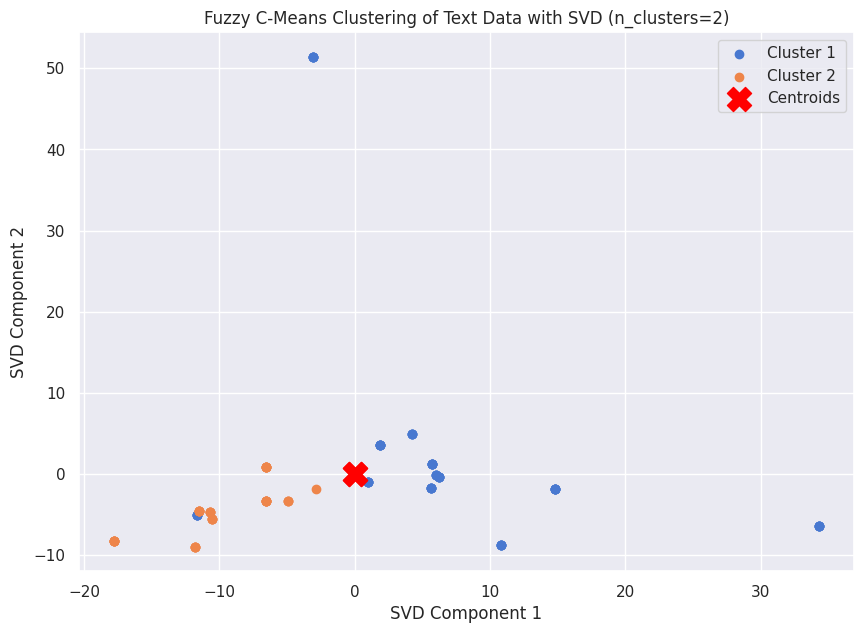

In [80]:
from fcmeans import FCM
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Untuk manipulasi DataFrame
from sklearn.metrics import silhouette_score

# Membaca data
df = pd.read_csv("kategori_encoded_data.csv")
df['stopword_removal'] = df['stopword_removal'].fillna('')  # Mengganti NaN dengan string kosong
texts = df['stopword_removal']

# Step 2: Vektorisasi TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
tfidf = tfidf_matrix.toarray()

# Step 3 Normalisasi Hasil TF-IDF
scaler = StandardScaler()
data_normalisasi = scaler.fit_transform(tfidf)

# Step 4: Reduksi dimensi menggunakan SVD
random_seed = 42  # Tetapkan seed untuk konsistensi
svd = TruncatedSVD(n_components=36, random_state=random_seed)
data_cluster = svd.fit_transform(data_normalisasi)

# Fuzzy C-Means Clustering
n_clusters = 2
fcm = FCM(n_clusters=n_clusters, m=2.0, max_iter=1000, epsilon=0.001, random_state=42)
fcm.fit(data_cluster)

# Mendapatkan hasil clustering
membership = fcm.u
cluster_labels = np.argmax(membership, axis=1)  # Menentukan cluster untuk setiap data

# Create a new DataFrame with the cluster labels and index aligned with 'texts'
cluster_df = pd.DataFrame({'Cluster': cluster_labels}, index=df.index)

# Merge the cluster labels back into the original DataFrame 'df'
df = df.join(cluster_df)  # Bergabung dengan df menggunakan join yang sesuai
# Tampilkan jumlah data pada setiap cluster
cluster_counts = df['Cluster'].value_counts()

# Tambahkan setelah cluster_labels dihasilkan
silhouette_avg = silhouette_score(data_cluster, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Cetak hasil jumlah data per cluster
print("Jumlah data pada setiap cluster:")
print(cluster_counts)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))

# Plot titik data dalam ruang 2D yang sudah direduksi, dengan warna berdasarkan cluster
for i in range(n_clusters):
    plt.scatter(data_cluster[cluster_labels == i, 1],
                data_cluster[cluster_labels == i, 0], label=f'Cluster {i+1}')

# Plot centroid
cluster_centers = fcm.centers
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], s=300, c='red', marker='X', label='Centroids')
plt.title(f'Fuzzy C-Means Clustering of Text Data with SVD (n_clusters={n_clusters})')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend()
plt.show()


In [81]:
# Menambahkan hasil klasterisasi ke dalam DataFrame
df['Cluster'] = cluster_labels
df

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,cleansing,case_folding,tokenize,stopword_removal,kategori_encoded,Cluster
0,Pesan Anies ke Tom Lembong Tersangka Korupsi I...,Reporter\nNovali Panji Nugroho\nEditor\nEko Ar...,30-10-2024 05:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nEko Ar...,reporter\nnovali panji nugroho\neditor\neko ar...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor eko ari w...,1,0
1,"Tom Lembong Tersangka Korupsi Impor Gula, Nama...",Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,29-10-2024 23:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,reporter\nnovali panji nugroho\neditor\nahmad ...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor ahmad fai...,1,0
2,"Profil Tom Lembong, Eks Mendag dan Co-Captain ...",Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,29-10-2024 22:55,Nasional,Reporter\nNovali Panji Nugroho\nEditor\nAhmad ...,reporter\nnovali panji nugroho\neditor\nahmad ...,"['reporter', 'novali', 'panji', 'nugroho', 'ed...",reporter novali panji nugroho editor ahmad fai...,1,0
3,Tom Lembong Sempat Unggah Hal Ini Sehari Sebel...,Reporter\nTempo.co\nEditor\nAndry Triyanto Tji...,30-10-2024 02:55,Nasional,Reporter\nTempoco\nEditor\nAndry Triyanto Tjit...,reporter\ntempoco\neditor\nandry triyanto tjit...,"['reporter', 'tempoco', 'editor', 'andry', 'tr...",reporter tempoco editor andry triyanto tjitra ...,1,0
4,"Prabowo Ingin Tingkatkan Pembangunan di Papua,...",Reporter\nVedro Imanuel G\nEditor\nAgung Seday...,29-10-2024 23:55,Bisnis,Reporter\nVedro Imanuel G\nEditor\nAgung Seday...,reporter\nvedro imanuel g\neditor\nagung seday...,"['reporter', 'vedro', 'imanuel', 'g', 'editor'...",reporter vedro imanuel g editor agung sedayu r...,0,1
...,...,...,...,...,...,...,...,...,...,...
95,Kementan Berencana Datangkan Sapi Hidup Ke Ind...,Reporter\nM. Raihan Muzzaki\nEditor\nAisha Sha...,30-10-2024 00:58,Bisnis,Reporter\nM Raihan Muzzaki\nEditor\nAisha Shai...,reporter\nm raihan muzzaki\neditor\naisha shai...,"['reporter', 'm', 'raihan', 'muzzaki', 'editor...",reporter m raihan muzzaki editor aisha shaidra...,0,1
96,"Profil Charles Sitorus, Tersangka dalam Kasus ...",Reporter\nAdil Al Hasan\nEditor\nRr. Ariyani Y...,30-10-2024 02:58,Bisnis,Reporter\nAdil Al Hasan\nEditor\nRr Ariyani Ya...,reporter\nadil al hasan\neditor\nrr ariyani ya...,"['reporter', 'adil', 'al', 'hasan', 'editor', ...",reporter adil al hasan editor rr ariyani yakti...,0,0
97,Bisik-bisik Prabowo kepada Fahri Hamzah Wakil ...,Reporter\nSukma Kanthi Nurani\nEditor\nS. Dian...,30-10-2024 03:58,Bisnis,Reporter\nSukma Kanthi Nurani\nEditor\nS Dian ...,reporter\nsukma kanthi nurani\neditor\ns dian ...,"['reporter', 'sukma', 'kanthi', 'nurani', 'edi...",reporter sukma kanthi nurani editor s dian and...,0,1
98,"Tom Lembong Jadi Tersangka, Ini Kata Anies, Mu...","Reporter\nAntara\nEditor\nYudono Yanuar\nRabu,...",30-10-2024 10:58,Bisnis,Reporter\nAntara\nEditor\nYudono Yanuar\nRabu ...,reporter\nantara\neditor\nyudono yanuar\nrabu ...,"['reporter', 'antara', 'editor', 'yudono', 'ya...",reporter editor yudono yanuar rabu oktober wib...,0,0


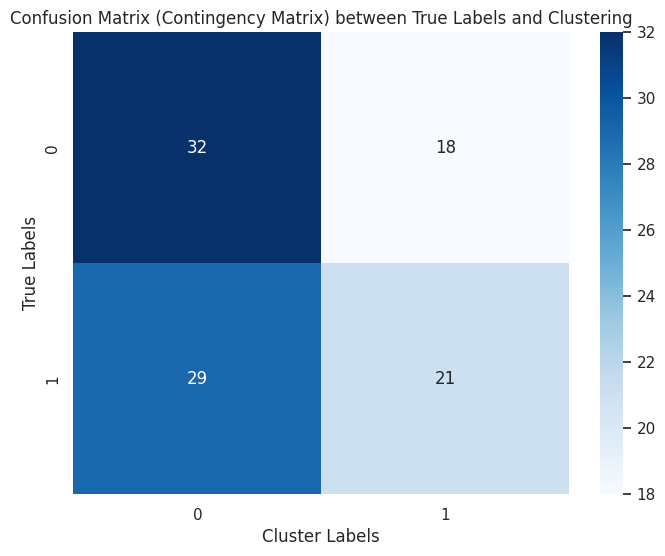

Confusion Matrix (Contingency Matrix):
[[32 18]
 [29 21]]


In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil kolom kategori dari dataframe sebagai label asli (true labels)
true_labels = df['kategori_encoded']  # Ganti 'kategori' dengan nama kolom kategori di DataFrame Anda

# Gunakan LabelEncoder untuk mengubah kategori menjadi angka
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Hitung confusion matrix antara true labels dan hasil clustering
conf_matrix = confusion_matrix(true_labels_encoded, cluster_labels)

# Tampilkan confusion matrix menggunakan heatmap untuk visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Contingency Matrix) between True Labels and Clustering')
plt.xlabel('Cluster Labels')
plt.ylabel('True Labels')
plt.show()

# Cetak confusion matrix secara numerik
print("Confusion Matrix (Contingency Matrix):")
print(conf_matrix)

In [83]:
# Tambahkan kolom ID jika belum ada
df['id'] = df.index

# Ambil kolom id, kategori_encoded, dan Cluster
selected_columns = df[['id', 'kategori_encoded', 'Cluster']]

# Tampilkan DataFrame yang hanya berisi kolom yang dipilih
print(selected_columns)

# Ambil semua anggota Cluster 0
cluster_0 = selected_columns[selected_columns['Cluster'] == 0]['id'].tolist()

# Ambil semua anggota Cluster 1
cluster_1 = selected_columns[selected_columns['Cluster'] == 1]['id'].tolist()

# Tampilkan hasil dalam bentuk list
print("Anggota Cluster 0:", cluster_0)
print("Anggota Cluster 1:", cluster_1)

    id  kategori_encoded  Cluster
0    0                 1        0
1    1                 1        0
2    2                 1        0
3    3                 1        0
4    4                 0        1
..  ..               ...      ...
95  95                 0        1
96  96                 0        0
97  97                 0        1
98  98                 0        0
99  99                 0        0

[100 rows x 3 columns]
Anggota Cluster 0: [0, 1, 2, 3, 7, 8, 10, 11, 14, 16, 17, 19, 20, 21, 22, 23, 27, 28, 30, 31, 34, 35, 38, 39, 40, 41, 42, 43, 47, 48, 50, 51, 54, 55, 58, 59, 60, 61, 62, 63, 67, 68, 70, 71, 74, 75, 78, 79, 80, 81, 82, 83, 87, 88, 90, 91, 92, 93, 96, 98, 99]
Anggota Cluster 1: [4, 5, 6, 9, 12, 13, 15, 18, 24, 25, 26, 29, 32, 33, 36, 37, 44, 45, 46, 49, 52, 53, 56, 57, 64, 65, 66, 69, 72, 73, 76, 77, 84, 85, 86, 89, 94, 95, 97]


In [84]:
from sklearn.metrics import silhouette_score
import numpy as np

# Mengonversi keanggotaan fuzzy menjadi label cluster dengan memilih cluster dengan membership tertinggi
fuzzy_labels = np.argmax(membership, axis=1)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(data_cluster, fuzzy_labels)

# Menampilkan Silhouette Score
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.1035


## Penyimpanan Hasil

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import TruncatedSVD
import joblib
import pandas as pd

# Membaca datadf =
pd.read_csv("kategori_encoded_data.csv")
data = df['stopword_removal'].astype(str)  # Pastikan data berupa string

# Fungsi untuk menerapkan FCM dalam pipeline
def fit_fcm(X):
    fcm = FCM(
        n_clusters=2,         # Jumlah cluster yang diinginkan
        m=2.0,                # Fuzziness coefficient
        max_iter=1000,        # Maksimal iterasi
        epsilon=0.001,        # Toleransi konvergensi
        random_state=42       # Menetapkan seed untuk random state
    )
    fcm.fit(X)
    return fcm

# Fungsi pembungkus untuk FCM (untuk FunctionTransformer)
def fit_fcm_wrapper(X):
    return fit_fcm(X)

# Tuning parameter TfidfVectorizer
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('svd', TruncatedSVD(n_components=20)),
    ('fcm', FunctionTransformer(func=fit_fcm_wrapper))
])

# Fit pipeline pada data pelatihan
pipeline.fit(data)

# Simpan pipeline yang telah dilatih
joblib.dump(pipeline, 'svd_tfidf_scaler_fcm_pipeline.pkl')

['svd_tfidf_scaler_fcm_pipeline.pkl']

In [96]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from fcmeans import FCM
import numpy as np
import pandas as pd

# 1. Memuat pipeline yang sudah dilatih sebelumnya
pipeline = joblib.load('svd_tfidf_scaler_fcm_pipeline.pkl')

# 2. Melakukan FCM pada data pelatihan (sudah dilabeli Games dan Sepakbola)
df = pd.read_csv("kategori_encoded_data.csv")
# Mengatasi nilai NaN dalam kolom 'stopword_removal'
df['stopword_removal'] = df['stopword_removal'].fillna('')  # Mengganti NaN dengan string kosong
data_pelatihan = df['stopword_removal']

# Transformasi data pelatihan menggunakan pipeline
X_train_transformed = pipeline[:-1].transform(data_pelatihan)
if hasattr(X_train_transformed, 'toarray'):
    X_train_transformed = X_train_transformed.toarray()

# 3. Melakukan clustering FCM pada data pelatihan
fcm_model = FCM(n_clusters=2, m=2.0, max_iter=1000, epsilon=0.001, random_state=42)
fcm_model.fit(X_train_transformed)

# 4. Menyelaraskan cluster dengan label yang diketahui
labels_train = df['kategori_encoded']

# Menyelaraskan cluster dengan label
cluster_labels = fcm_model.predict(X_train_transformed)
cluster_to_label = {0: 'Bisnis', 1: 'Nasional'} #0: 'Otomotif', 1: 'Keuangan' dan #0: 'Keuangan', 1: 'Otomotif'

# Menyelaraskan prediksi cluster dengan label
predicted_labels = [cluster_to_label[cluster] for cluster in cluster_labels]

# 5. Memuat data baru untuk prediksi
teks_baru = """Perekonomian Indonesia mencatatkan pertumbuhan yang pesat pada kuartal ketiga tahun 2024, dengan angka pertumbuhan ekonomi mencapai 5,2%. Angka ini menunjukkan pemulihan yang signifikan setelah mengalami penurunan akibat pandemi COVID-19 pada tahun-tahun sebelumnya. Pertumbuhan ini didorong oleh sektor manufaktur, yang mengalami lonjakan permintaan baik di pasar domestik maupun internasional."""

# Transformasi data baru menggunakan pipeline
X_new_transformed = pipeline[:-1].transform([teks_baru])
if hasattr(X_new_transformed, 'toarray'):
    X_new_transformed = X_new_transformed.toarray()

# 6. Prediksi cluster untuk data baru
cluster_new = fcm_model.predict(X_new_transformed)

# Menyelaraskan prediksi cluster dengan label
predicted_label_new = cluster_to_label[cluster_new[0]]

# 7. Menampilkan hasil
print(f"Teks baru ini diprediksi ke dalam cluster: {predicted_label_new}")

Teks baru ini diprediksi ke dalam cluster: Nasional


In [98]:
from fcmeans import FCM
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import joblib

# Fungsi untuk menerapkan FCM
def fit_fcm(X):
    fcm = FCM(
        n_clusters=2,
        m=1.5,
        max_iter=1000,
        epsilon=0.0001,
        random_state=42
    )
    fcm.fit(X)
    return fcm

# Pipeline tanpa FCM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF untuk teks
    ('scaler', StandardScaler(with_mean=False)),  # Normalisasi data
    ('svd', TruncatedSVD(n_components=10))  # Reduksi Dimensi
])

# Fit pipeline pada data
transformed_data = pipeline.fit_transform(data)  # Pastikan 'data' sudah diproses sebelumnya

# Jalankan FCM pada data yang sudah diproses
fcm_result = fit_fcm(transformed_data)

# Simpan pipeline dan hasil FCM dalam satu file (tuple)
joblib.dump((pipeline, fcm_result), 'model_fuzzy_cmeans.pkl')

['model_fuzzy_cmeans.pkl']